[0.01872701 0.04753572 0.0365997  0.02993292 0.00780093 0.00779973
 0.00290418 0.04330881 0.03005575 0.03540363]


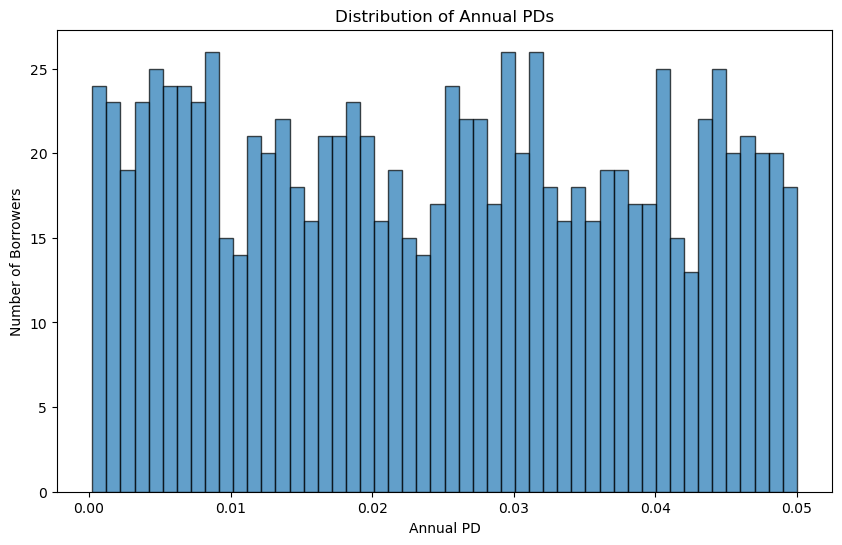

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Step 1: Create a portfolio of 1,000 borrowers with annualized PD
n_borrowers = 1000
np.random.seed(42)  # For reproducibility
annual_pd = np.random.uniform(0, 0.05, n_borrowers)

# Display the first few annual PDs for verification
print(annual_pd[:10])

# Visualization of the borrowers' annual PDs Distribution 
plt.figure(figsize=(10, 6))
plt.hist(annual_pd, bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of Annual PDs')
plt.xlabel('Annual PD')
plt.ylabel('Number of Borrowers')
plt.show()


[0.036000000000000004, 0.04004178538252809, 0.041687767553094515, 0.04496943538772735, 0.04978312295120195, 0.1, 0.08941465760762705, 0.08547975812487012, 0.08030239332277837, 0.0730682286933853, 0.06981098306367316, 0.06469024221890737, 0.06058786939120026, 0.1, 0.08521679938835551, 0.07386114492940182, 0.06768319712041902, 0.06161447989549916, 0.06007720224788752, 0.05579170160950699, 0.05110260203426737]
    Quarter        UR
0         0  0.036000
1         1  0.040042
2         2  0.041688
3         3  0.044969
4         4  0.049783
5         5  0.100000
6         6  0.089415
7         7  0.085480
8         8  0.080302
9         9  0.073068
10       10  0.069811
11       11  0.064690
12       12  0.060588
13       13  0.100000
14       14  0.085217
15       15  0.073861
16       16  0.067683
17       17  0.061614
18       18  0.060077
19       19  0.055792
20       20  0.051103


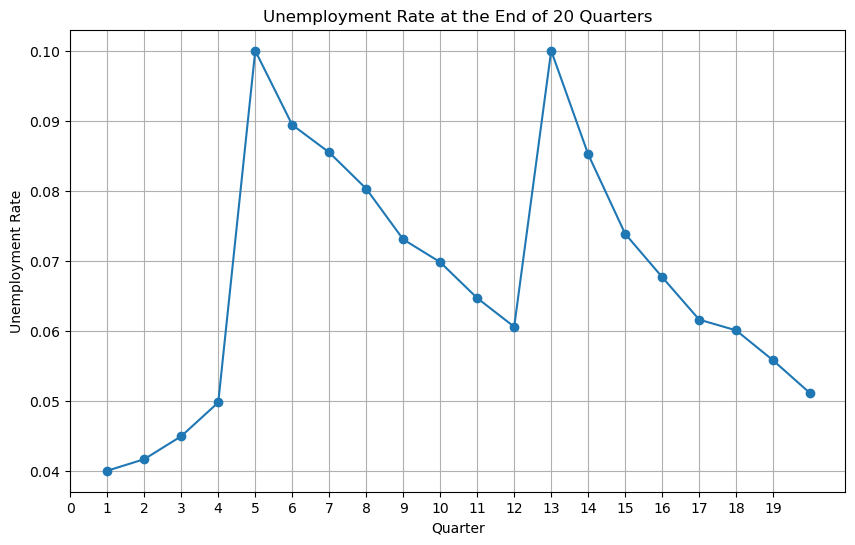

In [67]:
#Step2
import numpy as np
import pandas as pd
quarters = 20
initial_UR = 3.6 / 100
std_dev = 0.25 / 100
UR = [initial_UR]
np.random.seed(42) 
for t in range(1, 6):
    epsilon = np.random.normal(0, std_dev)
    new_UR = 0.01 + 0.8 * UR[t-1] + epsilon
    UR.append(new_UR)

#Manually set the UR for the 5th quarter to 10%.
UR[5] = 0.10
#continue
for t in range(6, 14):
    epsilon = np.random.normal(0, std_dev)
    new_UR = 0.01 + 0.8 * UR[t-1] + epsilon
    UR.append(new_UR)

UR[13] = 0.10

for t in range(14, quarters+1):
    epsilon = np.random.normal(0, std_dev)
    new_UR = 0.01 + 0.8 * UR[t-1] + epsilon
    UR.append(new_UR)

print(UR)
# Visualization
ur_df = pd.DataFrame({'Quarter': np.arange(0, quarters+1), 'UR': UR})
print(ur_df)

plt.figure(figsize=(10, 6))
plt.plot(ur_df['Quarter'][1:21], ur_df['UR'][1:21], marker='o')
plt.title('Unemployment Rate at the End of 20 Quarters')
plt.xlabel('Quarter')
plt.ylabel('Unemployment Rate')
plt.grid(True)
plt.xticks(range(quarters))
plt.show()

[0.59094269 0.61523434 0.66366569 0.73470682 1.47581504 1.31959496
 1.26152313 1.1851148  1.07835191 1.03028099 0.95470832 0.89416489
 1.47581504 1.25764234 1.09005389 0.9988788  0.90931576 0.88662839
 0.82338232 0.75417989]


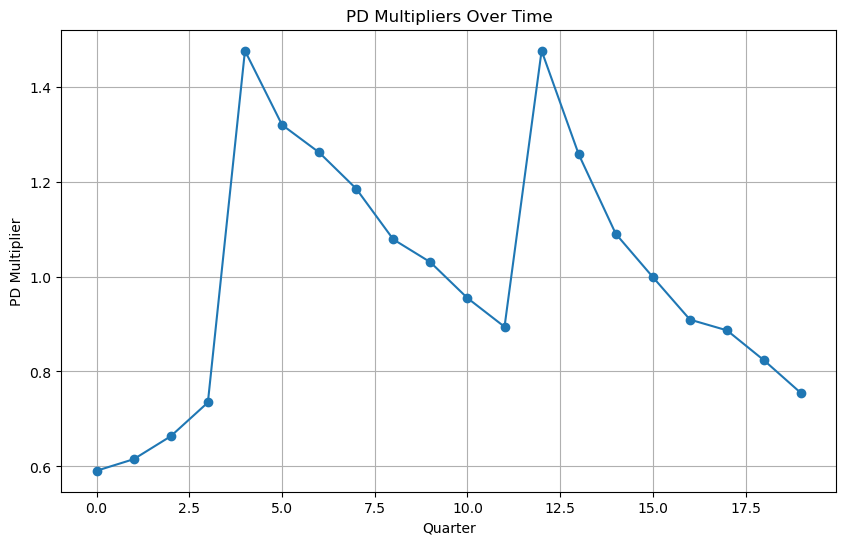

In [61]:
# Step 3: Create a PD multiplier
average_UR = np.mean(UR[-20:])
PD_multiplier = np.array(UR[-20:]) / average_UR

# Display the first few PD multipliers for verification
print(PD_multiplier)
# Visualization of PD multipliers over time
plt.figure(figsize=(10, 6))
plt.plot(range(quarters), PD_multiplier, marker='o')
plt.title('PD Multipliers Over Time')
plt.xlabel('Quarter')
plt.ylabel('PD Multiplier')
plt.grid(True)
plt.show()

In [62]:
# Step 4: Convert annual PD to quarterly PD
PD_quarterly = 1 - (1 - annual_pd) ** (1/4)

# Display the first few quarterly PDs for verification
print(PD_quarterly[:10])

[0.00471499 0.01210184 0.00927826 0.00756873 0.00195596 0.00195566
 0.00072684 0.01100762 0.00760014 0.0089709 ]


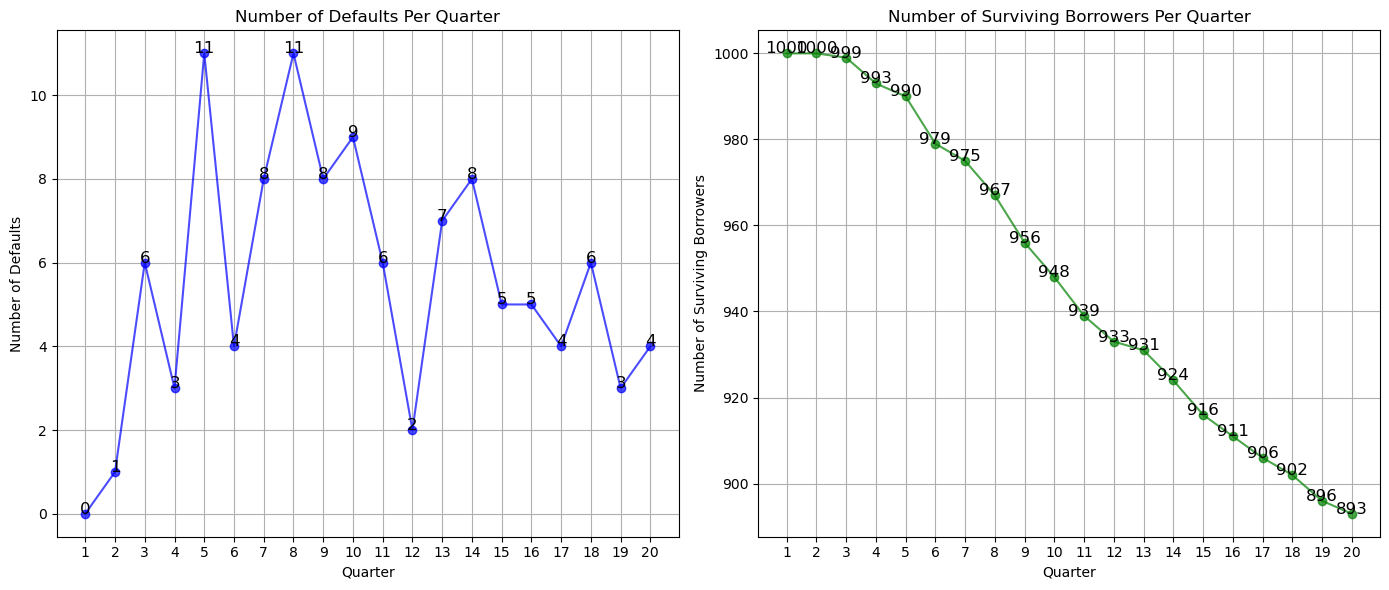

In [63]:
# Initialize lists for borrowers and defaults
borrowers = []
defaults = []

# Initial portfolio
portfolio_tmp = np.full(n_borrowers, PD_quarterly)
current_borrowers = len(portfolio_tmp)
borrowers.append(current_borrowers)

for t in range(quarters):
    random_draws = np.random.uniform(0, 1, current_borrowers)
    quarterly_PD_adjusted = portfolio_tmp * PD_multiplier[t]
    current_defaults = random_draws < quarterly_PD_adjusted

    # Record the number of defaults for the current quarter
    defaults.append(np.sum(current_defaults))
    
    # Update the portfolio by removing the defaulted borrowers
    portfolio_tmp = portfolio_tmp[~current_defaults]
    current_borrowers = len(portfolio_tmp)
    borrowers.append(current_borrowers)
    
#print(current_borrowers)
#print(borrowers)
#print(defaults)

# Convert default counts to numpy array
default_counts = np.array(defaults)
surviving_borrowers = np.array(borrowers[:-1]) # Number of surviving borrowers each quarter

#print(surviving_borrowers)
#print(default_counts)

# Visualize default counts and surviving borrowers per quarter
plt.figure(figsize=(14, 6))

# Subplot 1: Number of defaults per quarter
plt.subplot(1, 2, 1)
plt.plot(range(1, quarters + 1), default_counts, marker='o', linestyle='-', color='b', alpha=0.7)
plt.title('Number of Defaults Per Quarter')
plt.xlabel('Quarter')
plt.ylabel('Number of Defaults')
plt.grid(True)
for i in range(quarters):
    plt.text(i + 1, default_counts[i], str(default_counts[i]), fontsize=12, ha='center')

plt.xticks(range(1, quarters + 1))

# Subplot 2: Number of surviving borrowers per quarter
plt.subplot(1, 2, 2)
plt.plot(range(1, quarters + 1), surviving_borrowers, marker='o', linestyle='-', color='g', alpha=0.7)
plt.title('Number of Surviving Borrowers Per Quarter')
plt.xlabel('Quarter')
plt.ylabel('Number of Surviving Borrowers')
plt.grid(True)
for i in range(quarters):
    plt.text(i + 1, surviving_borrowers[i], str(surviving_borrowers[i]), fontsize=12, ha='center')

plt.xticks(range(1, quarters + 1))

plt.tight_layout()
plt.show()

In [64]:
# Step 6: Calculate historical default rate using pooled method
total_defaults = np.sum(default_counts)#calculate the sum default number in 20Q
print(total_defaults)
total_borrowers = np.sum(surviving_borrowers)
print(surviving_borrowers)
print(total_borrowers)

pooled_default_rate = total_defaults / total_borrowers
annualized_pooled_default_rate = 1 - (1 - pooled_default_rate) ** 4
print(annualized_pooled_default_rate )
print(f'Pooled Annualized Default Rate: {annualized_pooled_default_rate:.6f}')

111
[1000 1000  999  993  990  979  975  967  956  948  939  933  931  924
  916  911  906  902  896  893]
18958
0.023215304186947616
Pooled Annualized Default Rate: 0.023215


In [65]:
#Calculate historical default rate using average method
quarterly_default_rates = default_counts / surviving_borrowers
#print(quarterly_default_rates)
average_quarterly_default_rate = np.mean(quarterly_default_rates)
annualized_average_default_rate = 1 - (1 - average_quarterly_default_rate) ** 4
print(f'Average Annualized Default Rate: {annualized_average_default_rate:.6f}')

Average Annualized Default Rate: 0.023238


Comment: Regardless of whether we use the pooled method or the direct average, the results for the annual default rate calculation are very similar. The difference between these two methods is very small in the context of our project.